# Evaluation of Generated Data

The original data is small, roughly 600 in size. The performance of any deep learning model is only as good as its data, and generally, the more data, the more powerful our learning algorithm is. As such, we generate synthetic data that is high quality and maintains the properties of the orginal. We evaluate the quality of the generated data qualitatively via PCA and t-SNE plots. Good quality data would show good overlap with the original data for both PCA and t-SNE plots. From the visualization below, we are confident our generated data in ```train_data_extended.csv``` are high quality and could be used to augment the original in our following learning algorithms.

In [1]:
from metrics.visualization_metrics import visualization
import pandas as pd
from metrics.discriminative_metrics import discriminative_score_metrics
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


from metrics.visualization_metrics import visualization
import pandas as pd
from metrics.discriminative_metrics import discriminative_score_metrics
import numpy as np

In [2]:
# load full data and slice to get original and generated data
full_data = pd.read_csv("train_data_extended.csv") 
ori_data = full_data.iloc[:635] # original data is only until 635-th row
generated_data = full_data.iloc[635:]

# convert to np array for visualization function
ori_data = ori_data.to_numpy().reshape((ori_data.shape[0], ori_data.shape[1], 1))
generated_data = generated_data.to_numpy().reshape((generated_data.shape[0], generated_data.shape[1], 1))

data_len = np.min([len(ori_data), len(generated_data)])
ori_data = ori_data[:data_len]
generated_data = generated_data[:data_len]

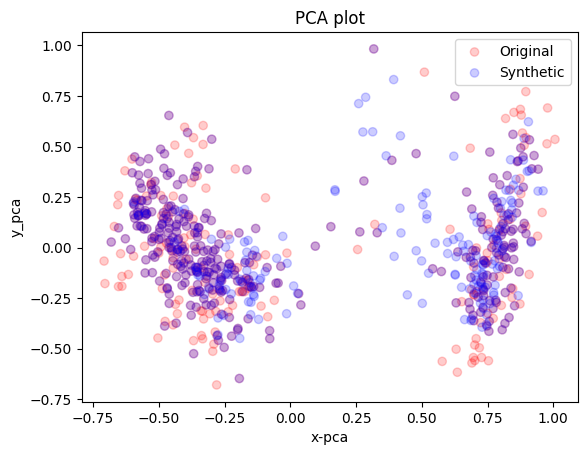

In [3]:
visualization(ori_data, generated_data, 'pca') # pca visualization

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 976 samples in 0.008s...
[t-SNE] Computed neighbors for 976 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 976 / 976
[t-SNE] Mean sigma: 0.226061
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.659187
[t-SNE] KL divergence after 300 iterations: 0.851154


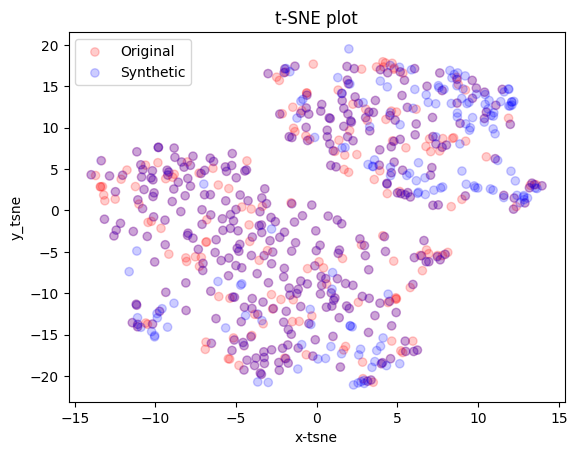

In [4]:
visualization(ori_data, generated_data, 'tsne') # tsne visualization

Discriminative score provides a quantitative measure of quality of generated data. A low score suggests that the generated data is indistinguishable from the original, indicating that it is of high quality.

In [5]:
# Discriminative Score
discriminative_score = list()
for _ in range(10):
    temp_disc = discriminative_score_metrics(ori_data, generated_data)
    discriminative_score.append(temp_disc)

metric_results = dict()
metric_results['discriminative'] = [np.mean(discriminative_score), np.std(discriminative_score)]
print(metric_results)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


c:\Users\HP\Documents\CNYSP\Y2S1\WorkshopsSeminars\psaminiproj\Code\metrics\discriminative_metrics.py:62: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf.compat.v1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name='d_cell')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use tf.global_variables instead.


c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


{'discriminative': [0.0, 0.0]}


# Classifier Models

In this section, we run several algorithms on ```train_data_extended.csv```, and provide the corresponding evaluation.

In [1]:
from model import * 

In [3]:
input_file = 'train_data_extended.csv'
df = pd.read_csv(input_file)
y = df['label']
x = df[['happy','angry','disgust','sad','fear','neutral','surprise','Pitch1','Pitch2','Pitch3','Pitch4','Pitch5','Pitch6','Pitch7','Pitch8','Pitch9','Pitch10','Pitch11','Pitch12']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

# XGBoostClassifier


In [4]:
y_train_pred_x, y_test_pred_x, xreg = xgbreg(x_train, x_test, y_train, y_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_x))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_x))
print()

scores = cross_val_score(xreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9501779359430605
Mean Squared Error (MSE) 	: 0.0498220640569395

Cross_val_Scores: [0.95857988 0.94674556 0.94047619 0.95238095 0.9702381 ]


Variable: happy Importance: 0.5
Variable: disgust Importance: 0.07000000029802322
Variable: surprise Importance: 0.05999999865889549
Variable: angry Importance: 0.05000000074505806
Variable: Pitch8 Importance: 0.05000000074505806
Variable: sad Importance: 0.029999999329447746
Variable: Pitch4 Importance: 0.029999999329447746
Variable: Pitch10 Importance: 0.029999999329447746
Variable: fear Importance: 0.019999999552965164
Variable: neutral Importance: 0.019999999552965164
Variable: Pitch2 Importance: 0.019999999552965164
Variable: Pitch7 Importance: 0.019999999552965164
Variable: Pitch11 Importance: 0.019999999552965164
Variable: Pitch12 Importance: 0.019999999552965164
Variable: Pitch1 Importance: 0.009999999776482582
Variable: Pitch3 Importance: 0.009999999776482582
Variable: Pitch5 Importance: 0.009999999776482582
Variable: Pitch6 Importance: 0.009999999776482582
Variable: Pitch9 Importance: 0.0


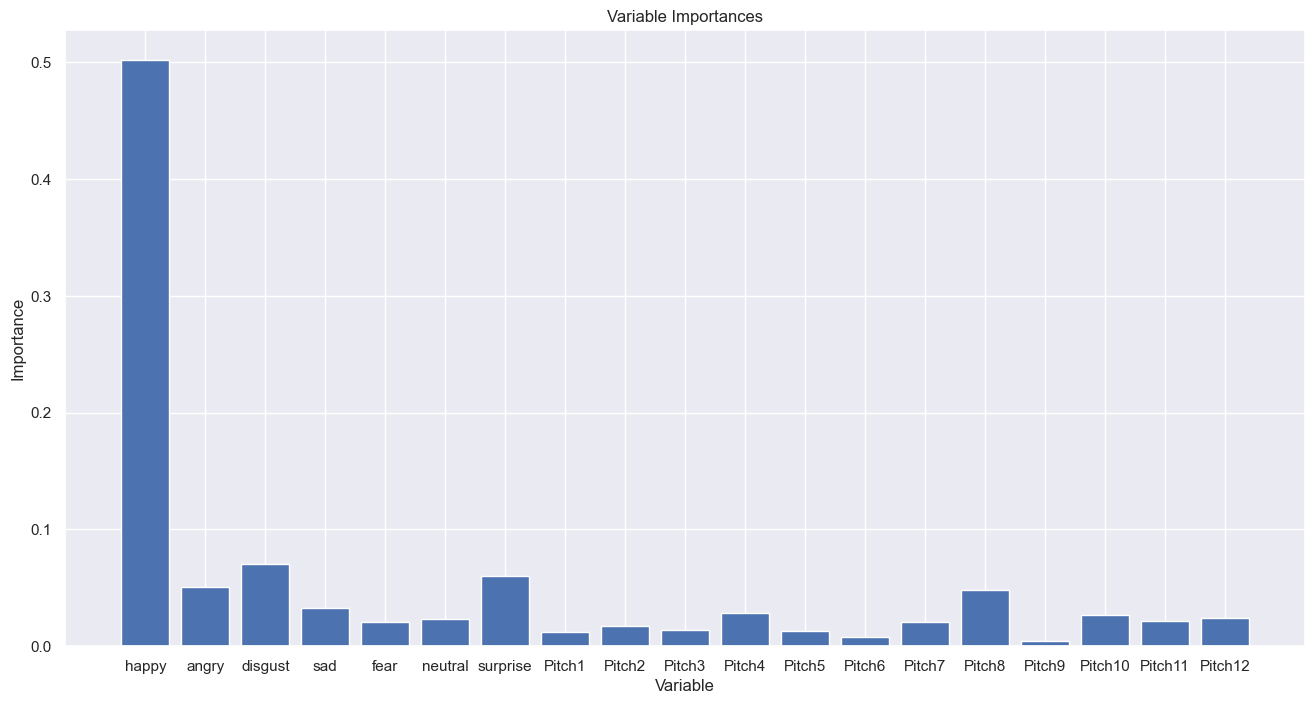

In [5]:
importances = list(xreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Logistic Regression


In [6]:
y_train_pred_log, y_test_pred_log, logreg = logireg(x_train, x_test, y_train, y_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_log))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_log))
print()

scores = cross_val_score(logreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8776722090261283
Mean Squared Error (MSE) 	: 0.12232779097387174

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8291814946619217
Mean Squared Error (MSE) 	: 0.1708185053380783

Cross_val_Scores: [0.87573964 0.84023669 0.86904762 0.875      0.89880952]


Variable: angry Importance: 2.93
Variable: sad Importance: 2.28
Variable: Pitch11 Importance: 1.85
Variable: Pitch8 Importance: 1.29
Variable: Pitch5 Importance: 1.15
Variable: Pitch12 Importance: 1.1
Variable: Pitch10 Importance: 1.08
Variable: Pitch7 Importance: 0.78
Variable: Pitch3 Importance: 0.69
Variable: Pitch9 Importance: 0.5
Variable: Pitch4 Importance: 0.37
Variable: fear Importance: 0.26
Variable: Pitch6 Importance: -0.3
Variable: Pitch1 Importance: -0.4
Variable: Pitch2 Importance: -0.53
Variable: neutral Importance: -1.04
Variable: disgust Importance: -1.2
Variable: surprise Importance: -2.89
Variable: happy Importance: -2.92


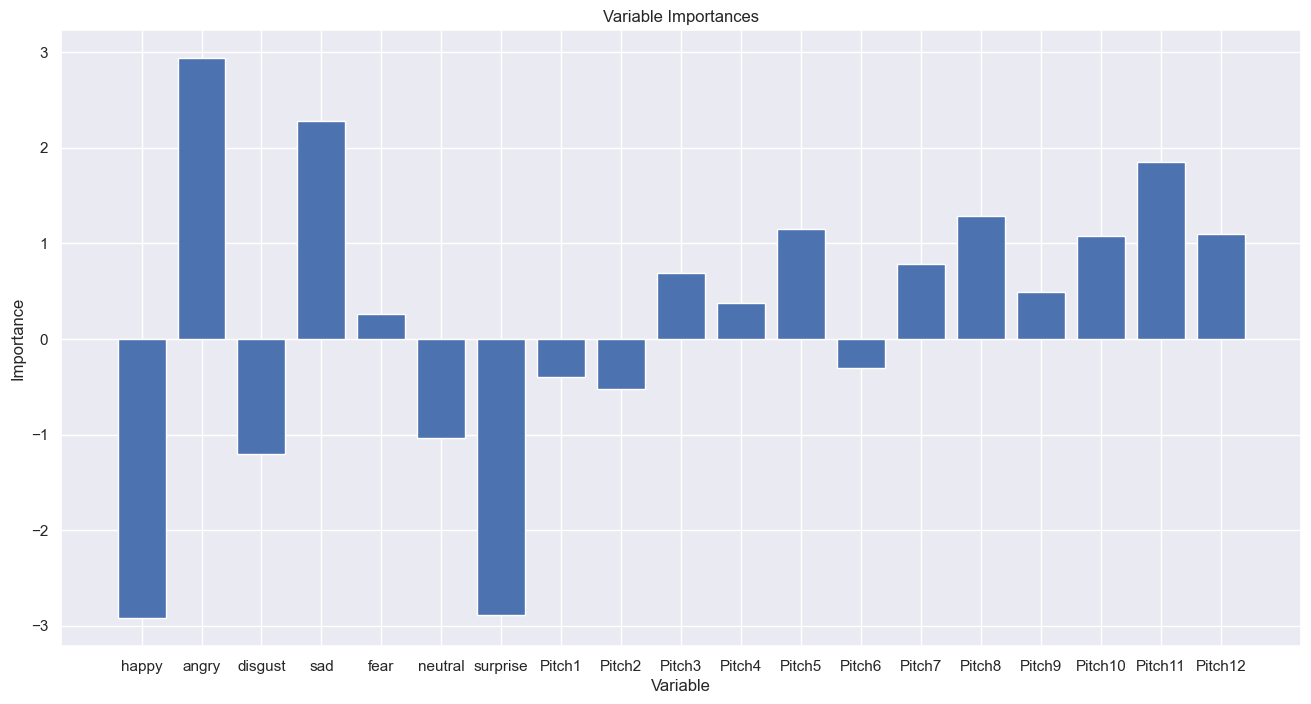

In [7]:
importances = logreg.coef_[0]
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Random Forest

In [8]:
y_train_pred_for, y_test_pred_for, base = forreg(x_train, x_test, y_train, y_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", base.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_for))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", base.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_for))
print()

scores = cross_val_score(base, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9430604982206405
Mean Squared Error (MSE) 	: 0.05693950177935943

Cross_val_Scores: [0.93491124 0.94674556 0.92857143 0.94642857 0.96428571]


Variable: happy Importance: 0.24
Variable: sad Importance: 0.15
Variable: angry Importance: 0.13
Variable: surprise Importance: 0.1
Variable: disgust Importance: 0.07
Variable: Pitch11 Importance: 0.04
Variable: fear Importance: 0.03
Variable: neutral Importance: 0.03
Variable: Pitch8 Importance: 0.03
Variable: Pitch10 Importance: 0.03
Variable: Pitch12 Importance: 0.03
Variable: Pitch1 Importance: 0.02
Variable: Pitch2 Importance: 0.02
Variable: Pitch4 Importance: 0.02
Variable: Pitch5 Importance: 0.02
Variable: Pitch6 Importance: 0.02
Variable: Pitch3 Importance: 0.01
Variable: Pitch7 Importance: 0.01
Variable: Pitch9 Importance: 0.01


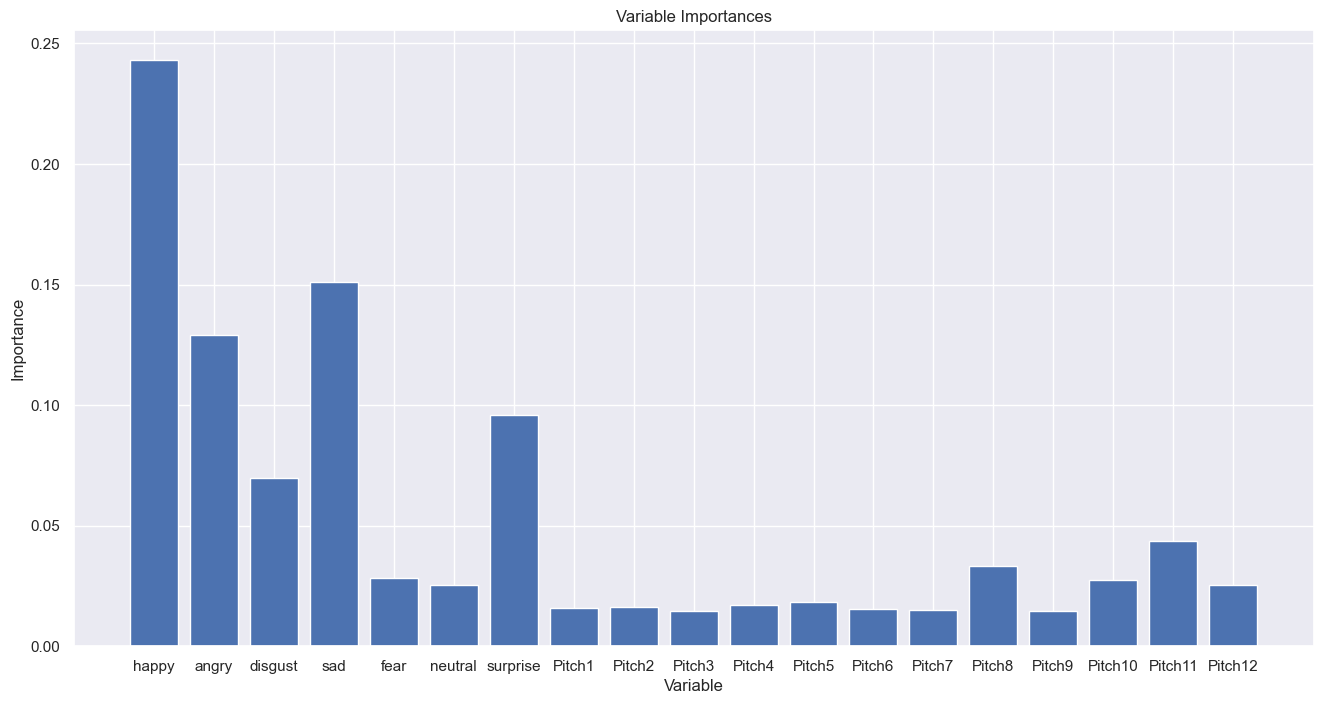

In [9]:
importances = list(base.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Keras

In [10]:
y_train_pred_ker_correct, y_test_pred_ker_correct, model = kerreg(x_train, x_test, y_train, y_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2(y_train_pred_ker_correct,y_train))
print("Mean Squared Error (MSE) \t:", mse(y_train_pred_ker_correct,y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2(y_test_pred_ker_correct,y_test))
print("Mean Squared Error (MSE) \t:", mse(y_test_pred_ker_correct,y_test))
print()

Epoch 1/150
85/85 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.5309
Epoch 2/150
85/85 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.6021
Epoch 3/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.8397
Epoch 4/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.8634
Epoch 5/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.8646
Epoch 6/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.8670
Epoch 7/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.8682
Epoch 8/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.8670
Epoch 9/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.8705
Epoch 10/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.8705
Epoch 11/

From our various models, we observe that accuracy are high for all. Nonetheless, we argue that the logistic regression serves our purpose the best, because it presents the most sensible $R^{2}$ value and $MSE$. In theory, the deep learning methods, such as the MLP, and XGBoost, show very optimistic results, even with the test data, suggesting that overfitting is not a problem. However, in our opinion, perhaps they are too ideal to be true. Therefore, we have chosen to err on the safe side and decide to go with the humble logistic regression which seems more realistic.

The moral of the story, then, is that a simple model, such as the logistic regression, may work best, even with the abundance of deep learning methods we find ourselves indundated with.